<a href="https://colab.research.google.com/github/AndyOmondi17/CompilerConstruction/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**B Lab Activities**

 **Group Members: 105493, 101170, 112448,103437,120047**

**Lab Activity 5**


1.    **Review what syntax analysis is and in a few words, describe what this phase of compiler construction entails.**
Syntax Analysis is a second phase of the compiler design process in which the given input string is checked for the confirmation of rules and structure of the formal grammar.It analyses the syntactical structure and checks if the given input is in the correct syntax of the programming language or not.


2.  **Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple 
syntax analyzer. [Consult the web, show and explain the simple codes that you find]**
A syntax analyzer or parser takes the input from a lexical analyzer in the form of token streams. The parser analyzes the source code (token stream) against the production rules to detect any errors in the code. The output of this phase is a parse tree.This way, the parser accomplishes two tasks, i.e., parsing the code, looking for errors and generating a parse tree as the output of the phase.
Parsers are expected to parse the whole code even if some errors exist in the program. Parsers use error recovering strategies, which we will learn later in this chapter.





In [ ]:
/*Syntax Analyser (Parser)
PASC600
Nikos Plessas 
AEM : 615*/



/* BLOCK A: Statements block*/
%{
#include <stdio.h>
#include <string.h>
#include <stdlib.h>
#include <stdlib.h>
#include <math.h>
#include "hashtbl.c" //include the hash table
HASHTBL *symbol; //Symbol Table declaration (global)


//#define MAX_LINE_SIZE 256

char filename[64];
extern FILE *yyin;
int scope; //global variable for scope, initialized to 0
error_no = 0; //global variable for error count initialized to 0
#define MAX_ERRORS 5 //max number of errors

%}

%union {
  unsigned int integer;
  double real;
  char *string;
  char character;
  int boolean;
}

//keywords
%token <string> T_PROGRAM T_CONST T_TYPE T_ARRAY T_OF T_VAR T_FORWARD T_FUNCTION T_PROCEDURE T_INTEGER T_REAL T_BOOLEAN T_CHAR T_STRING T_BEGIN T_END T_IF T_THEN T_ELSE T_WHILE T_DO T_FOR T_DOWNTO T_TO T_READ T_WRITE T_LENGTH T_ID T_SCONST//T_OTHERWISE T_CASE T_EOF 

//integer consts
%token <integer> T_ICONST

//real consts
%token <real> T_RCONST

//logical
%token <boolean> T_BCONST

//chars
%token <character> T_CCONST


//operators
%token <string> 
T_RELOP
T_ADDOP
T_OROP
T_MULDIVANDOP
T_NOTOP
T_LPAREN
T_RPAREN
T_SEMI
T_DOT
T_COMMA
T_COLON
T_LBRACK
T_RBRACK
T_ASSIGN
T_DOTDOT
T_EQU

//assoc and priority (operators)
%nonassoc T_COLON
%nonassoc T_LBRACK T_RBRACK
%left T_OROP
%nonassoc T_RELOP
%nonassoc T_NOTOP
%left T_ADDOP
%left T_MULDIVANDOP
%right T_EQU
%nonassoc T_LPAREN T_RPAREN

//solving dangling else
%nonassoc T_THEN
%nonassoc T_ELSE

//start symbol of the Grammar = program
//%start program;


%%
/*BLOCK B: Rules block*/

program: header declarations subprograms comp_statement T_DOT
    ;

header: T_PROGRAM T_ID T_SEMI {hashtbl_insert(symbol,$1,NULL,scope);}
    ;

declarations: constdefs typedefs vardefs
    ;

constdefs: T_CONST constant_defs T_SEMI
    |/*empty*/
    ;
        
constant_defs: constant_defs T_SEMI T_ID T_EQU expression {hashtbl_insert(symbol,$3,NULL,scope);}
    | T_ID T_EQU expression {hashtbl_insert(symbol,$1,NULL,scope);}
    ;
            
expression: expression T_RELOP expression
    | expression T_EQU expression
    | expression T_OROP expression
    | expression T_ADDOP expression
    | expression T_MULDIVANDOP expression
    | T_ADDOP expression
    | T_NOTOP expression
    | variable
    | T_ID T_LPAREN expressions T_RPAREN
    | T_LENGTH T_LPAREN expression T_RPAREN
    | constant
    | T_LPAREN expression T_RPAREN
    ;
            
variable: T_ID {hashtbl_insert(symbol,$1,NULL,scope);}
    | variable T_LBRACK expressions T_RBRACK
    ;
         
expressions: expressions T_COMMA expression
    | expression
    ;
            
constant: T_ICONST
    | T_RCONST
    | T_BCONST
    | T_CCONST
    | T_SCONST
    ;
        
typedefs: T_TYPE type_defs T_SEMI
    |/*empty*/
    ;
        
type_defs: type_defs T_SEMI T_ID T_EQU type_def {hashtbl_insert(symbol,$3,NULL,scope);}
    | T_ID T_EQU type_def {hashtbl_insert(symbol,$1,NULL,scope);}
    ;
        
type_def: T_ARRAY T_LBRACK dims  T_RBRACK T_OF typename
    | T_LPAREN identifiers T_RPAREN
    | limit T_DOTDOT limit
    ;
        
dims: dims T_COMMA limits
    | limits
    ;
    
limits: limit T_DOTDOT limit
    | T_ID {hashtbl_insert(symbol,$1,NULL,scope);}
    ;
    
limit: sign T_ICONST
    | T_CCONST
    | T_BCONST
    | T_ADDOP T_ID {hashtbl_insert(symbol,$2,NULL,scope);}
    | T_ID
    ;
    
sign: T_ADDOP
    |/*empty*/
    ;
    
typename: standard_type
    | T_ID {hashtbl_insert(symbol,$1,NULL,scope);}
    ;
    
standard_type: T_INTEGER
    | T_REAL
    | T_BOOLEAN
    | T_CHAR
    | T_STRING
    ;
    
vardefs: T_VAR variable_defs T_SEMI
    |/*empty*/
    ;
    
variable_defs: variable_defs T_SEMI identifiers T_COLON typename
    | identifiers T_COLON typename;
    
identifiers: identifiers T_COMMA T_ID {hashtbl_insert(symbol,$3,NULL,scope);}
    | T_ID {hashtbl_insert(symbol,$1,NULL,scope);}
    ;
    
subprograms: subprograms subprogram T_SEMI
    |/*empty*/
    ;
    
subprogram: sub_header T_SEMI T_FORWARD
    | sub_header T_SEMI declarations subprograms comp_statement
    ;
    
sub_header: T_FUNCTION T_ID formal_parameters T_COLON typename
    | T_PROCEDURE T_ID formal_parameters
    | T_FUNCTION 
    ;
    
formal_parameters: T_LPAREN parameter_list T_RPAREN
    |/*empty*/
    ;
    
parameter_list: parameter_list T_SEMI pass identifiers T_COLON typename
    | pass identifiers T_COLON typename;
    
pass: T_VAR
    |/*empty*/
    ;
    
comp_statement: T_BEGIN statements T_END
    ; 

statements: statements T_SEMI statement
    | statement
    ;
    
statement: assignment
    | if_statement
    | while_statement
    | for_statement
    | subprogram_call
    | io_statement
    | comp_statement
    |//empty
    ;
    
    
assignment: variable T_ASSIGN expression
    ;

//shift-reduce error on IF: 
// combine if_statement & if_tail as one rule
// define prec&priority as: 
// %nonassoc T_THEN
// %nonassoc T_ELSE see O'Rilley page 208

if_statement: T_IF expression T_THEN statement 
    | T_IF expression T_THEN statement  T_ELSE statement
    | error {yyerrok;yyclearin;printf("Error at IF--ignoring. Total errors: %d\n",error_no);} //ignore error on "IF" so that parsing can complete
    ;
    
while_statement: T_WHILE  expression {scope++;} T_DO statement {hashtbl_get(symbol,scope);scope--;} 
    ;

for_statement: T_FOR T_ID T_ASSIGN iter_space {scope++;} T_DO statement {hashtbl_get(symbol,scope);scope--;}
    ;

iter_space: expression T_TO expression
    | expression T_DOWNTO expression
    ;
    
subprogram_call: T_ID
    | T_ID T_LPAREN expression T_RPAREN
    ;
    

io_statement: T_READ T_LPAREN read_list T_RPAREN
    | T_WRITE T_LPAREN write_list T_RPAREN
    ;
    
read_list: read_list T_COMMA read_item
    | read_item
    ;
    
    
read_item: variable
    ;

write_list: write_list T_COMMA write_item
    |write_item
    ;
    
write_item: expression
    ;

%%
/*BLOCK C: Functions*/
int  main(int argc,char ** argv){
    int out;
    
    //check if an input file is passed as an argument
	if(argc<2){
        printf("No input file!\n");
		exit(1);
    }
		
	yyin = fopen(argv[1],"r");
    strcpy(filename, argv[1]);

    if (yyin == NULL) {
        printf("File not found!\n");
        exit(1);
    }
    
    //input file ok!
    
    //symbol table initialize/create
    if(!(symbol=hashtbl_create(16, NULL))) {
    fprintf(stderr, "ERROR: hashtbl_create() failed\n");
    exit(EXIT_FAILURE);
    }

        
    out=yyparse();
    printf("Syntax analyzer started.\n");
    

    if(!out) {// yyparse == 0 - parsing completed
    printf("Syntax analyzer finished succesfully.\n");
    fclose(yyin);
    printf("File closed succesfully\n");
    return(0);
    }
    
    else { //yyparse()==1 - could not complete parsing
        printf("Syntax analyzer failed\n");
        hashtbl_destroy(symbol);
        fclose(yyin); // close input file
        printf("File closed succesfully\n");
        return(1);
    }

	
	
}



extern int line_no;

void yyerror(char *s) {
    error_no++;
    fprintf(stderr, "line %d: %s\n", line_no, s);
}

//cemetary -- things that i'm not 100% sure that must be erased

/*
statement: notif_statement
    | if_statement
    ;
    
notif_statement: assignment
    | while_statement
    | for_statement
    | subprogram_call
    | io_statement
    | comp_statement
    |//empty
    ;
    
if_statement: matched
    | unmatched
    ;
    
matched: T_IF expression T_THEN matched T_ELSE matched
    | notif_statement
    ;
    
unmatched: T_IF expression T_THEN if_statement
    | T_IF expression T_THEN matched T_ELSE unmatched
    ;
*

**Lab Activity 4**


1.   **Using an example explain what is predictive parsing**
It is a special form of recursive descent parsing, where no backtracking is required, so this can predict which products to use to replace the input string

2.   **What is LL(1) parsing** A top-down parser that uses a one-token lookahead

3.   **Why do we get the First () and Follow () i.e. what do these two functions Really Represent?** 



*   FIRST ()− It is a function that gives the set of terminals that begin the strings derived from the production rule. 

*  Follow( )- is a set of terminal symbols that appear immediately to the right. 

Benefit of FIRST ( ) and FOLLOW ( )
---
*   It can be used to prove the LL (K) characteristic of grammar.
*   It can be used to promote in the construction of predictive parsing tables.
*   It provides selection information for recursive descent parsers.

4.  **Are there any unique attributes associated with Top-Down parsing?**
The process of constructing the parse tree which starts from the root and goes down to the leaf
Top-Down Parsers uses leftmost derivation to construct a parse tree.



*   Top-Down Parsers constructs from the Grammar which is free from ambiguity and left recursion.

*   Top-Down Parsers uses leftmost derivation to construct a parse tree.
*   It does not allow Grammar With Common Prefixes.













**Lab Activity 2**

**Lab Activity 1:Flex,Bison,Lex,Yacc**

**Convert NFA to DFA**
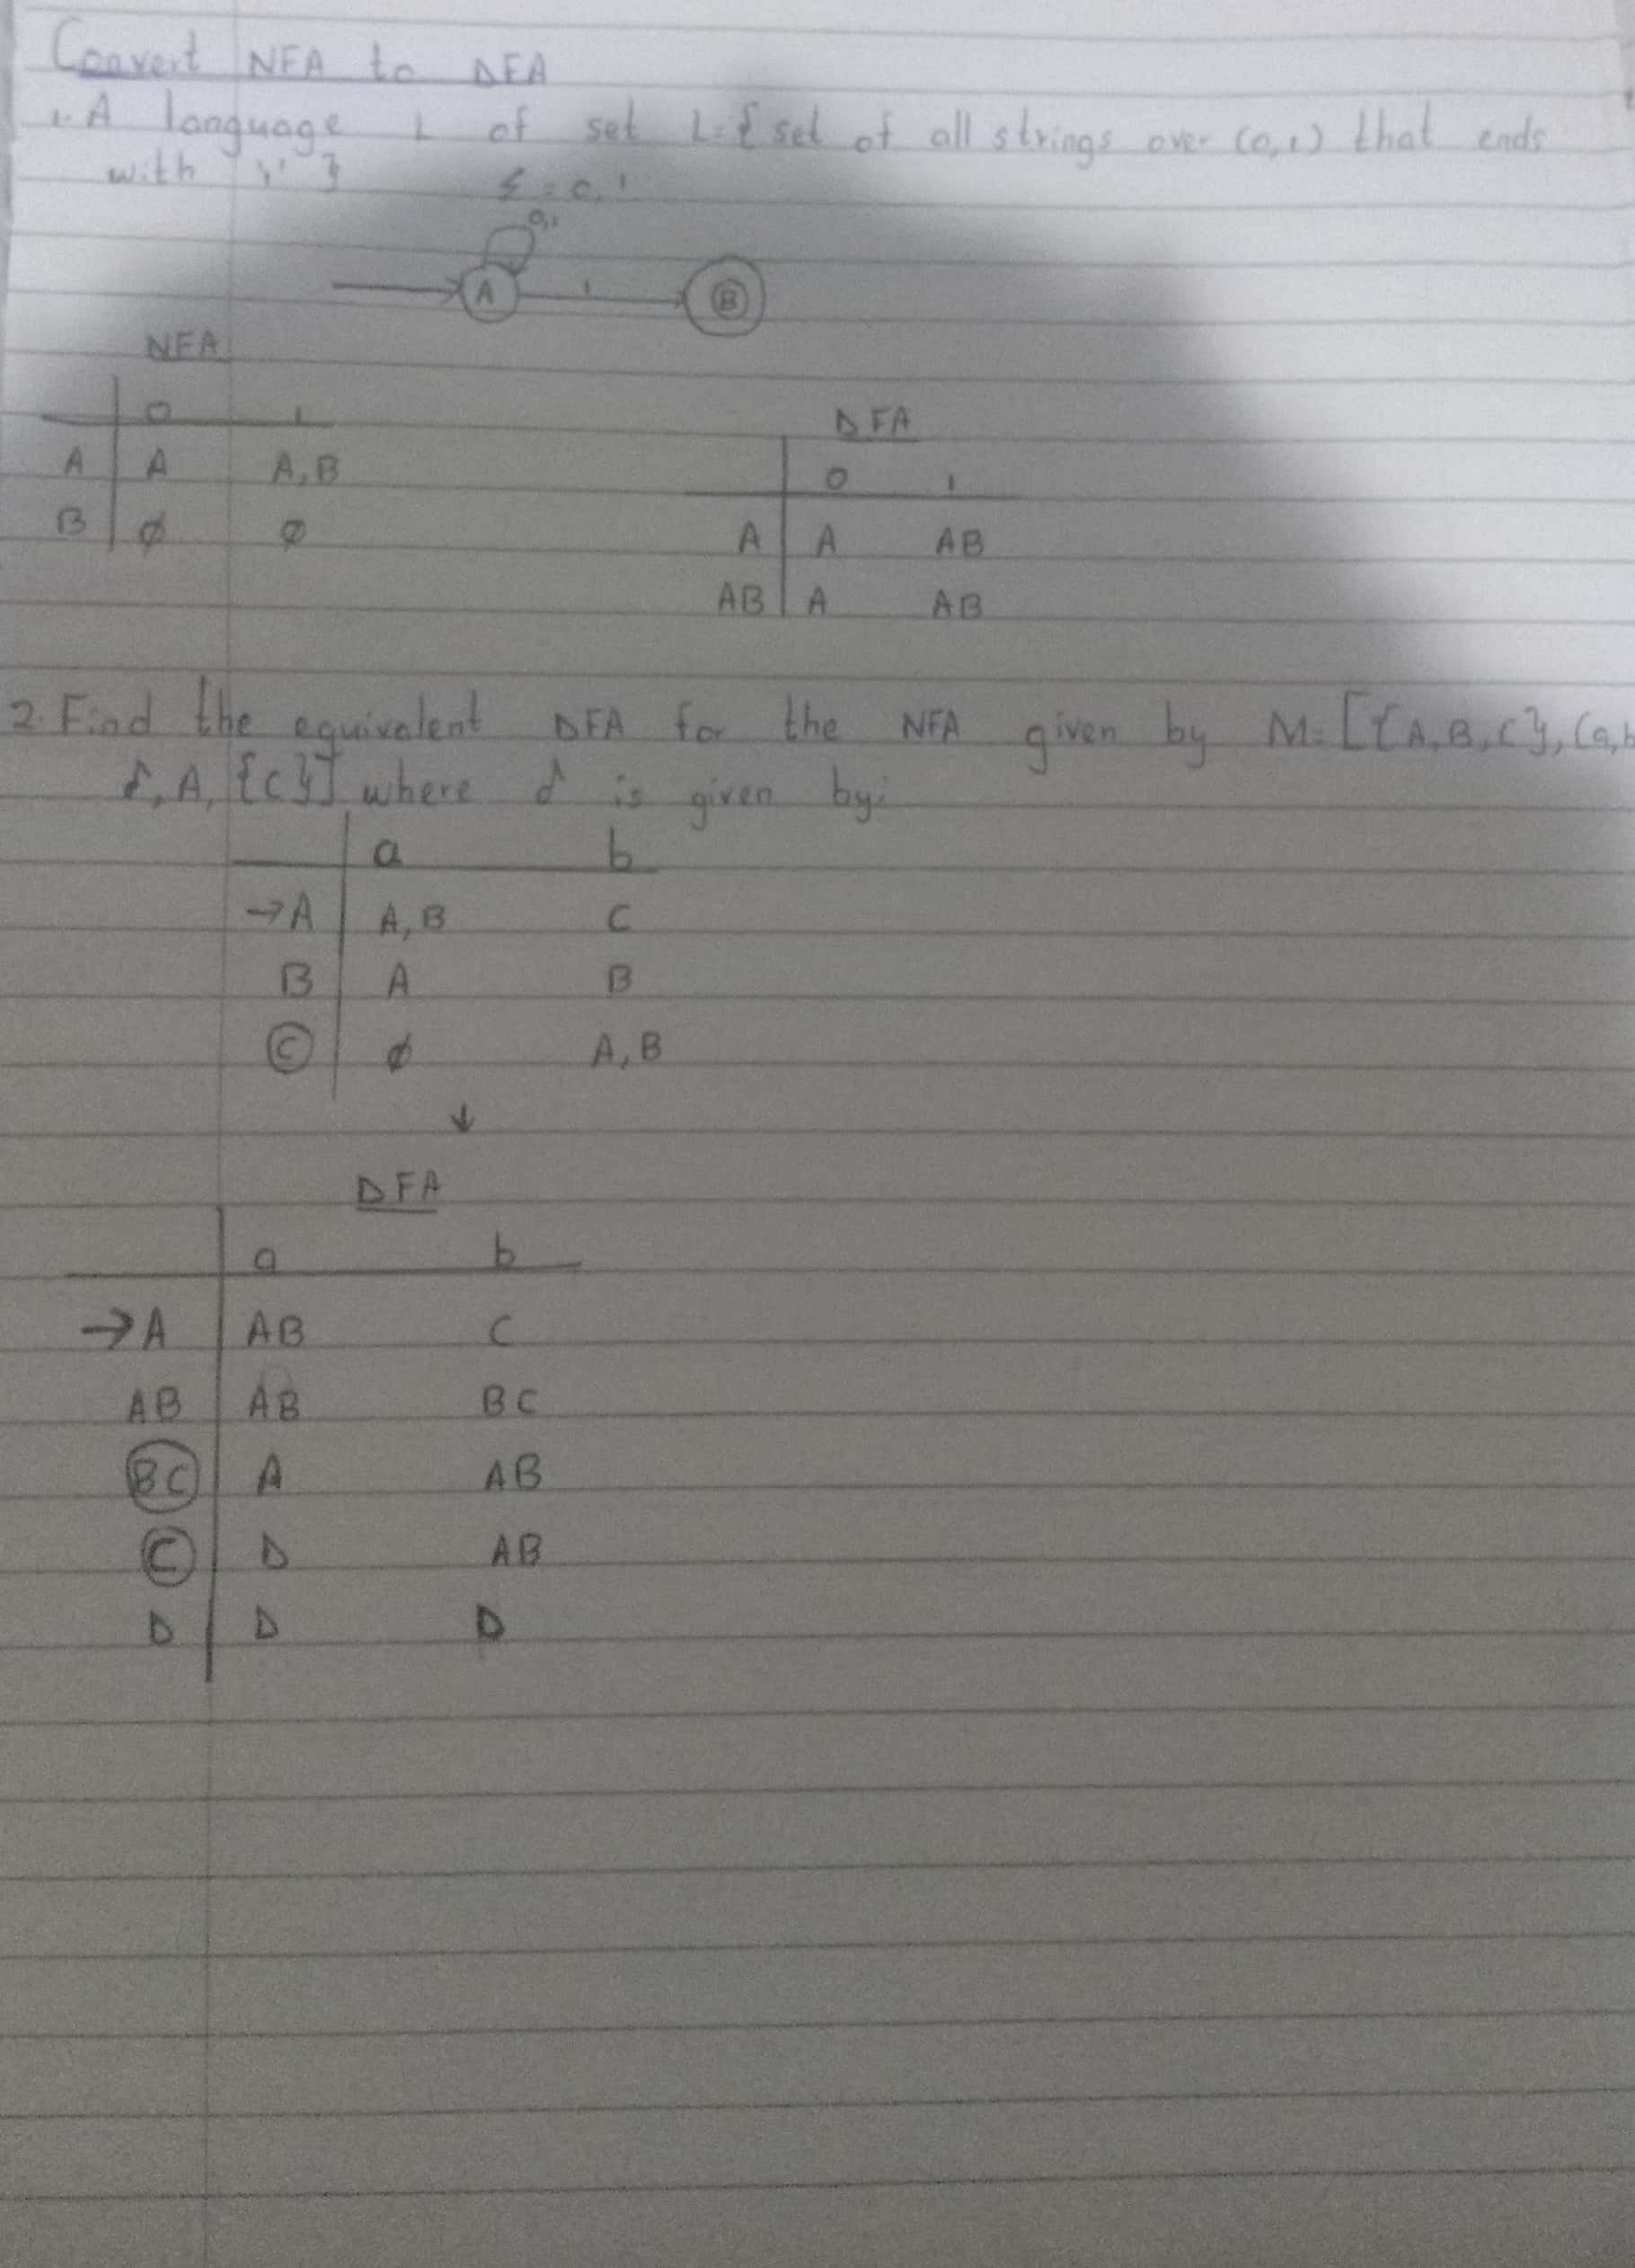

**Using Flex For A Simple Lexical Analyzer**

Checks and rejects statements if they contain both uppercase and lowercase letters.

In [ ]:

%{

/*USE OF REJECT STATEMENT*/
#undef yywrap
#define yywrap() 1

%}

%%

[a-z]+ {
	printf("\ncontains only lowercase letters = ");
	ECHO;
	
	}

[a-zA-Z]+ {
	printf("\ncontains both uppercase and lowercase letters = ");
	ECHO;
	REJECT;
	
	}

. {
	printf("\ncontains mixed letters = ");
	ECHO;
	
	}

%%


main()
{
	yylex();
}

**Flex(fast lexical analyzer generator)**-A tool/computer program for generating lexical analyzers (scanners or lexers) written by Vern Paxson in C around 1987.A scanner divides this into the tokens alpha, equal sign, beta, plus sign, gamma, and semicolon. Then the parser determines that beta + gamma is an expression, and that the expression is assigned to alpha.

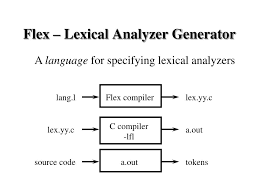


In [ ]:
/* scanner for a toy Pascal-like language */

%{
/* need this for the call to atof() below */
#include <math.h>
%}

DIGIT    [0-9]
ID       [a-z][a-z0-9]*

%%

{DIGIT}+    {
            printf( "An integer: %s (%d)\n", yytext,
                    atoi( yytext ) );
            }

{DIGIT}+"."{DIGIT}*        {
            printf( "A float: %s (%g)\n", yytext,
                    atof( yytext ) );
            }

if|then|begin|end|procedure|function        {
            printf( "A keyword: %s\n", yytext );
            }

{ID}        printf( "An identifier: %s\n", yytext );

"+"|"-"|"*"|"/"   printf( "An operator: %s\n", yytext );

"{"[^}\n]*"}"     /* eat up one-line comments */

[ \t\n]+          /* eat up whitespace */

.           printf( "Unrecognized character: %s\n", yytext );

%%

main( argc, argv )
int argc;
char **argv;
    {
    ++argv, --argc;  /* skip over program name */
    if ( argc > 0 )
            yyin = fopen( argv[0], "r" );
    else
            yyin = stdin;

    yylex();
    }

**Bison** is a general purpose parser generator that is part part of the GNU project.it reads a specification in the BNF notation (a context-free language),warns about any parsing ambiguities, and generates a parser that reads sequences of tokens and decides whether the sequence conforms to the syntax specified by the grammar.
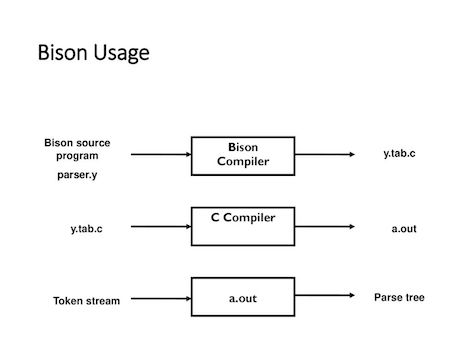

### Bison code for simple calculator

In [ ]:
/* simplest version of calculator */
%{
#include <stdio.h>
%}

/* declare tokens */
%token NUMBER
%token ADD SUB MUL DIV ABS
%token EOL

%%

calclist: /* nothing */                       matches at beginning of input
 | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
 ;

exp: factor       default $$ = $1 
 | exp ADD factor { $$ = $1 + $3; }
 | exp SUB factor { $$ = $1 - $3; }
 ;

factor: term       default $$ = $1 
 | factor MUL term { $$ = $1 * $3; }
 | factor DIV term { $$ = $1 / $3; }
 ;

term: NUMBER  default $$ = $1 
 | ABS term   { $$ = $2 >= 0? $2 : - $2; }
;
%%
main(int argc, char **argv)
{
  yyparse();
}

yyerror(char *s)
{
  fprintf(stderr, "error: %s\n", s);
}

SyntaxError: invalid syntax (204015599.py, line 1)

**Lex** It is a program that generates lexical analyzer. It is used with YACC parser generator.The lexical analyzer is a program that transforms an input stream into a sequence of tokens.It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.

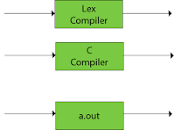

In [ ]:
/*lex program to count number of words*/
%{
#include<stdio.h>
#include<string.h>
int i = 0;
%}
  
/* Rules Section*/
%%
([a-zA-Z0-9])*    {i++;} /* Rule for counting 
                          number of words*/
  
"\n" {printf("%d\n", i); i = 0;}
%%
  
int yywrap(void){}
  
int main()
{   
    // The function that starts the analysis
    yylex();
  
    return 0;


**Yacc**-Yet Another Compiler-Compiler.It provides a general tool for imposing structure on the input to a computer program.A parser, calls the user-supplied low-level input routine (the lexical analyzer) to pick up the basic items (called tokens) from the input stream. These tokens are organized according to the input structure rules, called grammar rules; when one of these rules has been recognized, then user code supplied for this rule, an action, is invoked; actions have the ability to return values and make use of the values of other actions.

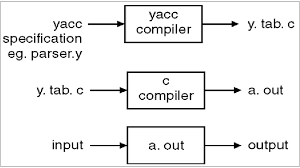

In [ ]:
%{
/*** Auxiliary declarations section ***/

#include<stdio.h>
#include<stdlib.h>

/* Custom function to print an operator*/
void print_operator(char op);

/* Variable to keep track of the position of the number in the input */
int pos=0;

%}

 /*** YACC Declarations section ***/
%token DIGIT
%left '+'
%left '*'
%%

/*** Rules Section ***/
start : expr '\n'		{exit(1);}
      ;

expr: expr '+' expr     {print_operator('+');}
    | expr '*' expr     {print_operator('*');}
    | '(' expr ')'
    | DIGIT             {printf("NUM%d ",pos);}
    ;

%%


/*** Auxiliary functions section ***/

void print_operator(char c){
    switch(c){
        case '+'  : printf("PLUS ");
                    break;
        case '*'  : printf("MUL ");
                    break;
    }
    return;
}

yyerror(char const *s)
{
    printf("yyerror %s",s);
}

yylex(){
    char c;
    c = getchar();
    if(isdigit(c)){
        pos++;
        return DIGIT;
    }
    else if(c == ' '){
        yylex();         /*This is to ignore whitespaces in the input*/
    }
    else {
        return c;
    }
}

main()
{
	yyparse();
	return 1;
}

**Refferences**

Flex (Fast Lexical Analyzer Generator ). (2018, April 12). GeeksforGeeks. https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/

Yacc Yet Another Compiler Compiler by Stephen C. Johnson. (n.d.). Www.cs.utexas.edu. Retrieved September 13, 2022, from https://www.cs.utexas.edu/users/novak/yaccpaper.htm

‌Lex Program to count number of words. (2018, May 15). GeeksforGeeks. https://www.geeksforgeeks.org/lex-program-count-number-words/

‌LEX - javatpoint. (n.d.). Www.javatpoint.com. https://www.javatpoint.com/lex

‌Levine, J., Flex &amp; Bison. O'Reilly Online Learning. Available at: https://www.oreilly.com/library/view/flex-bison/9780596805418/ch01.html [Accessed September 14, 2022]. 

‌